# CD7: clustering

In this notebook, we perform a clustering analysis of the CD7 data on features extracted from SCIP.

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [26]:
from sklearn.feature_selection import VarianceThreshold
import anndata
import scanpy
scanpy.settings.verbosity = 3

In [9]:
data_dir = Path("/data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/results/scip/202203221745/")

In [10]:
df = pq.read_table(data_dir / "features.parquet").to_pandas()

df = df.set_index(["meta_panel", "meta_replicate", "meta_P", "meta_id"])
df = df.loc["D"]
df = df.loc[numpy.load(data_dir / "index.npy", allow_pickle=True)]
df = df.sort_index()

In [11]:
df.shape

(34718, 1494)

In [15]:
adata = anndata.AnnData(df.filter(regex="feat").astype(numpy.float32))
for col in df.filter(regex='meta'):
    adata.obs[col] = df[col]

In [20]:
var = VarianceThreshold(threshold=0.001).fit(adata.X)
adata.var["variance_thres"] = var.get_support()

In [29]:
scanpy.pp.scale(adata)

In [30]:
scanpy.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:02)


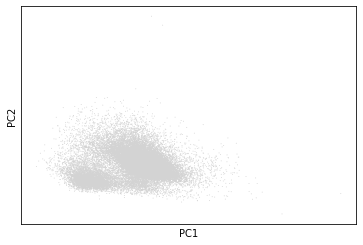

In [31]:
scanpy.pl.pca(adata)

In [32]:
scanpy.pp.neighbors(adata, n_neighbors=30)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)


In [33]:
scanpy.tl.leiden(adata)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:11)


In [51]:
scanpy.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)


In [53]:
markers = [col for col in adata.var.index if col.startswith("feat_sum")]

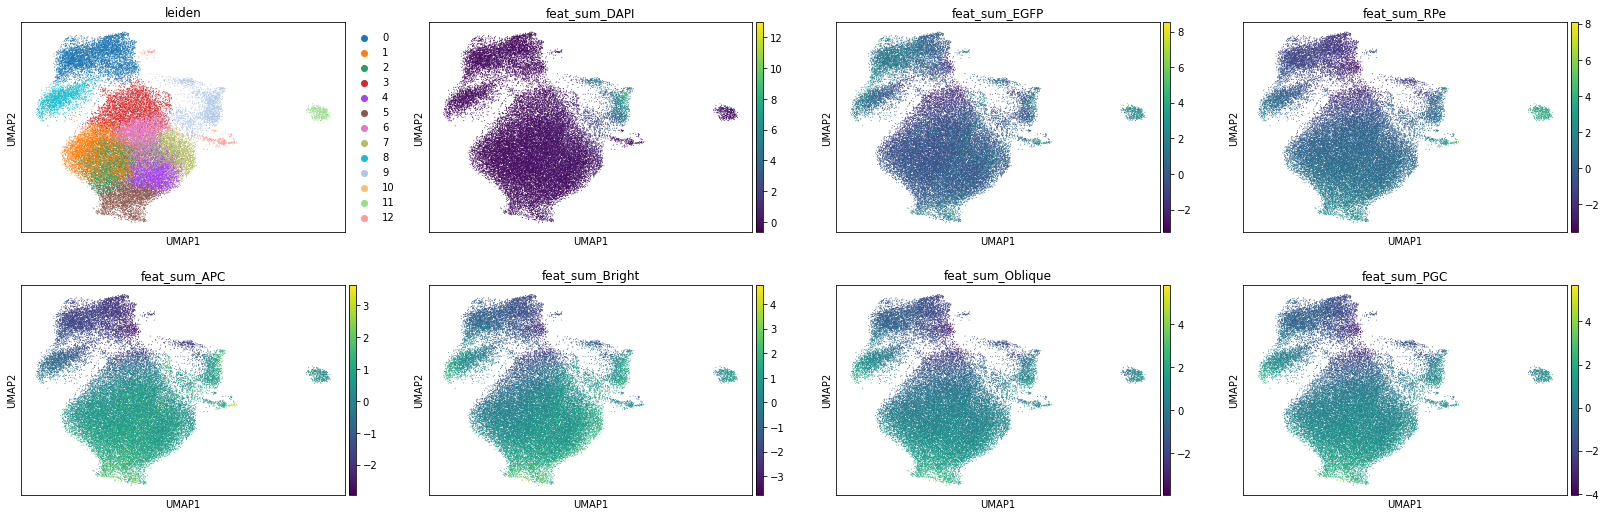

In [57]:
scanpy.pl.umap(adata, color=["leiden"] + markers)

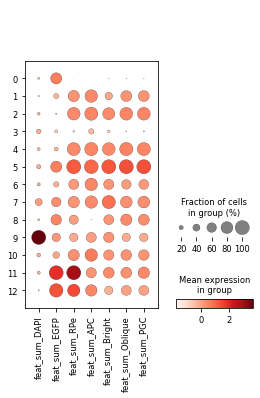

In [54]:
scanpy.pl.dotplot(adata, markers, groupby='leiden')

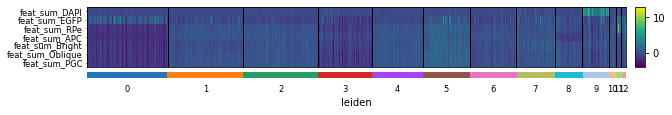

In [56]:
scanpy.pl.heatmap(adata, markers, groupby='leiden', swap_axes=True)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


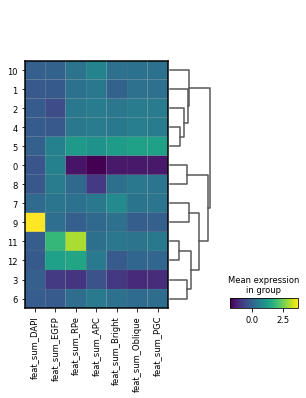

In [59]:
scanpy.pl.matrixplot(adata, markers, groupby='leiden', dendrogram=True)

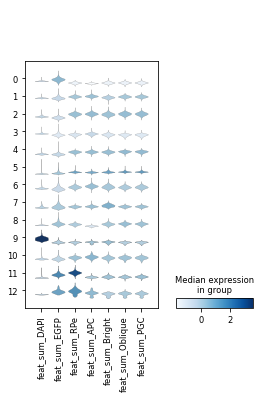

In [60]:
scanpy.pl.stacked_violin(adata, markers, groupby='leiden', rotation=90);